In [67]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns


iris = sns.load_dataset('iris')
data = torch.tensor(iris[iris.columns[0:4]].values).float()
labels = torch.zeros(len(data), dtype=torch.long)
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

In [68]:
def createModel():
    model = nn.Sequential(
        nn.Linear(4,128),
        nn.ReLU(),
        nn.Linear(128,128),
        nn.ReLU(),
        nn.Linear(128,3)
    )

    lossfun = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=.01)
    return model, lossfun, optimizer

In [69]:
numepochs = 200
def trainModel(trainProp):
    losses = torch.zeros(numepochs)
    trainAcc = []
    testAcc  = []
    

    # separate train from test data
    # Note 1: Unique split for each epoch
    # Note 2: Specifying the train size not test size
    X_train,X_test, Y_train,Y_test = train_test_split(data,labels,train_size=trainProp)
    
    for epochi in range(numepochs):
        yHat = model(X_train)
        loss = lossfun(yHat, Y_train)

        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Compute Train Accuracy
        trainAcc.append(100*torch.mean((torch.argmax(yHat,axis=1)==Y_train).float()).item())
        
        # Compute Test Accuracy
        predlabels = torch.argmax(model(X_test), axis=1)
        testAcc.append(100*torch.mean((predlabels==Y_test).float()).item())
    
    # Function Output
    return trainAcc, testAcc

In [70]:
# create model
model,lossfun,optimizer = createModel()
print(model)
# train model
trainAcc,testAcc = trainModel(.8)

Sequential(
  (0): Linear(in_features=4, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=3, bias=True)
)


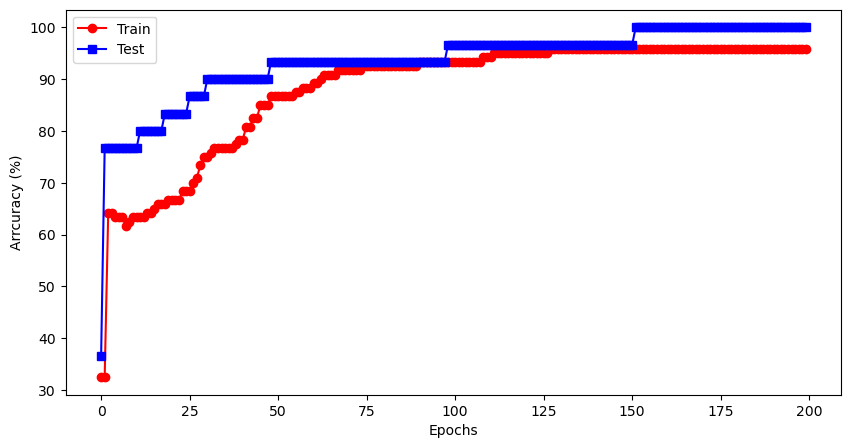

In [71]:
# Plot
fig = plt.figure(figsize=(10,5))

plt.plot(trainAcc, 'ro-')
plt.plot(testAcc, 'bs-')
plt.xlabel('Epochs')
plt.ylabel('Arrcuracy (%)')
plt.legend(['Train', 'Test'])
plt.show()
quote = "We can change the whole world, Gonna start it over, dont you know what we could be? A new beginning, fighting 'tile we're winning, Tell me that you're in it, dont you want to be?"

### Experiment

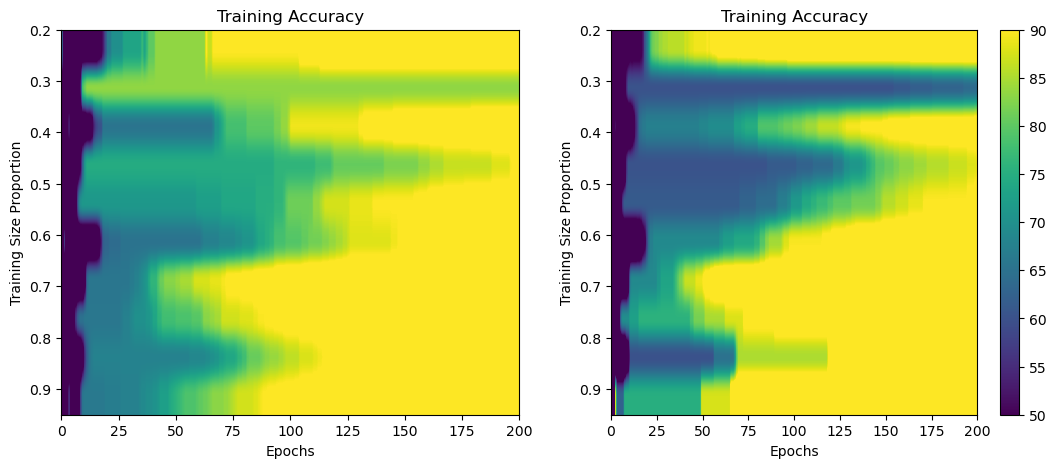

In [72]:
trainSetSizes = np.linspace(.2,.95,10)
allTrainAcc = np.zeros((len(trainSetSizes), numepochs))
allTestAcc = np.zeros((len(trainSetSizes), numepochs))

for i in range(len(trainSetSizes)):
    model,lossfun,optimizer = createModel()
    trainAcc,testAcc = trainModel(trainSetSizes[i])
    allTrainAcc[i,:] = trainAcc 
    allTestAcc[i,:] = testAcc

fig,ax = plt.subplots(1,2,figsize=(13,5))
ax[0].imshow(allTrainAcc,aspect='auto',
             vmin=50,vmax=90,extent=[0, numepochs,trainSetSizes[-1], trainSetSizes[0]])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Training Size Proportion')
ax[0].set_title('Training Accuracy')


p = ax[1].imshow(allTestAcc,aspect='auto',
             vmin=50,vmax=90,extent=[0, numepochs,trainSetSizes[-1], trainSetSizes[0]])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training Size Proportion')
ax[1].set_title('Training Accuracy')
fig.colorbar(p,ax=ax[1])
plt.show()